In [1]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/X-IIoTID/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/X-IIoTID/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn import svm


best_svm = svm.SVC(C=10, kernel='poly', tol=0.01)
best_svm.fit(x_train, y_train)

dump(best_svm, "/home/jovyan/X-IIoTID/pre_train/SVM.joblib")
model = best_svm


epsilon = 0.01
FPR: [1.17478904e-02 1.11699842e-03 2.21727904e-04 6.63330361e-05
 2.20908227e-05 0.00000000e+00 5.81833854e-04 8.82834116e-03
 6.83476765e-04 0.00000000e+00 2.15766799e-05 4.18538421e-02
 1.04164163e-04 3.57073993e-05 4.58601865e-02 1.21596200e-04
 4.28146340e-05 3.57140306e-05 0.00000000e+00]
TPR: [0.63662481 0.87894737 0.90692124 0.57130301 0.99887057 0.8
 0.92512315 0.64619845 0.98365777 0.27272727 0.99664148 0.99700883
 0.99850911 0.86206897 0.5639728  0.6713948  0.97802198 0.04366812
 1.        ]
FNR: [0.36337519 0.12105263 0.09307876 0.42869699 0.00112943 0.2
 0.07487685 0.35380155 0.01634223 0.72727273 0.00335852 0.00299117
 0.00149089 0.13793103 0.4360272  0.3286052  0.02197802 0.95633188
 0.        ]
TNR: [0.98825211 0.998883   0.99977827 0.99993367 0.99997791 1.
 0.99941817 0.99117166 0.99931652 1.         0.99997842 0.95814616
 0.99989584 0.99996429 0.95413981 0.9998784  0.99995719 0.99996429
 1.        ]
Accuracy: 0.9162803964914783
Precision(micro,macro,wei

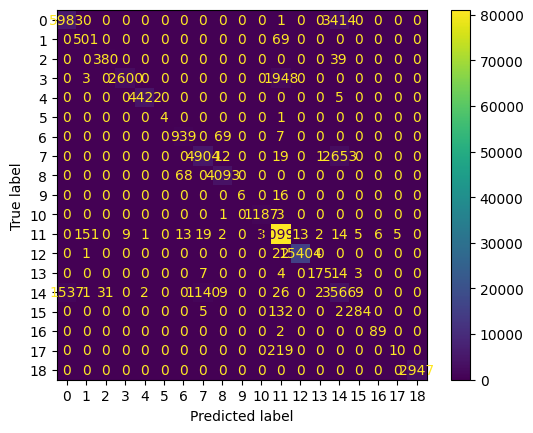

epsilon = 0.1
FPR: [1.80842607e-02 5.62150938e-02 1.24453727e-03 1.99721401e-01
 1.17817721e-04 1.42627919e-05 2.59311137e-03 1.80713354e-02
 2.19888439e-02 1.40434212e-02 7.32456361e-02 3.36322490e-01
 1.17945883e-02 2.54808001e-02 6.00416707e-02 3.56920612e-03
 4.85232519e-04 7.11352062e-02 2.69516255e-03]
TPR: [0.52128112 0.19122807 0.97374702 0.01384311 0.9916422  0.8
 0.10935961 0.05086309 0.31482817 0.36363636 0.12510495 0.27888083
 0.25286835 0.20197044 0.23960146 0.21985816 0.45054945 0.
 0.31218188]
FNR: [0.47871888 0.80877193 0.02625298 0.98615689 0.0083578  0.2
 0.89064039 0.94913691 0.68517183 0.63636364 0.87489505 0.72111917
 0.74713165 0.79802956 0.76039854 0.78014184 0.54945055 1.
 0.68781812]
TNR: [0.98191574 0.94378491 0.99875546 0.8002786  0.99988218 0.99998574
 0.99740689 0.98192866 0.97801116 0.98595658 0.92675436 0.66367751
 0.98820541 0.9745192  0.93995833 0.99643079 0.99951477 0.92886479
 0.99730484]
Accuracy: 0.29240533409398844
Precision(micro,macro,weighted): 

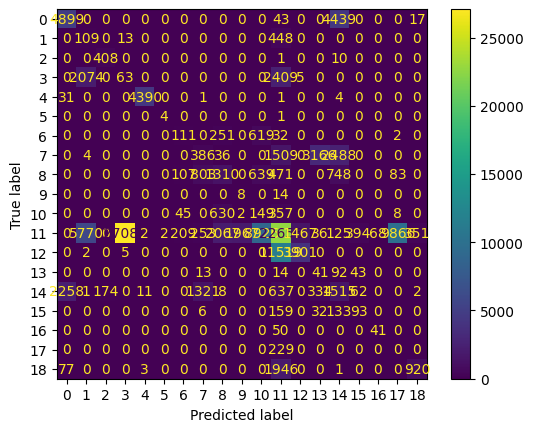

epsilon = 0.2
FPR: [1.97046594e-02 1.26671918e-01 2.27449915e-03 1.40618666e-01
 1.33575841e-02 4.27883758e-05 2.32015228e-02 2.28360763e-02
 1.12986793e-01 1.40790825e-02 4.63395163e-02 2.97486057e-01
 1.06127257e-01 2.33740636e-02 4.34630004e-02 7.36014649e-03
 1.03468699e-03 5.71353062e-02 1.34758127e-02]
TPR: [0.33666738 0.15438596 0.98568019 0.04350692 0.85565846 0.8
 0.10640394 0.05613388 0.0519106  0.81818182 0.00167926 0.10235232
 0.01730732 0.04926108 0.10026886 0.08983452 0.35164835 0.09170306
 0.01425178]
FNR: [0.66333262 0.84561404 0.01431981 0.95649308 0.14434154 0.2
 0.89359606 0.94386612 0.9480894  0.18181818 0.99832074 0.89764768
 0.98269268 0.95073892 0.89973114 0.91016548 0.64835165 0.90829694
 0.98574822]
TNR: [0.98029534 0.87332808 0.9977255  0.85938133 0.98664242 0.99995721
 0.97679848 0.97716392 0.88701321 0.98592092 0.95366048 0.70251394
 0.89387274 0.97662594 0.956537   0.99263985 0.99896531 0.94286469
 0.98652419]
Accuracy: 0.12682022391784925
Precision(micro,m

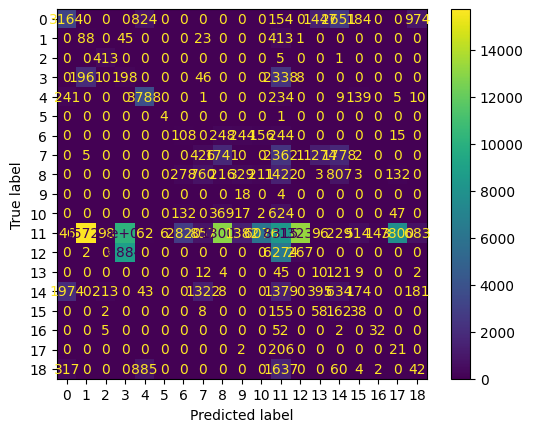

epsilon = 0.3
FPR: [1.65785129e-02 1.14370614e-01 6.73766728e-03 8.60118368e-02
 1.01985965e-02 2.06810483e-04 3.23169199e-02 4.37873659e-02
 1.26465249e-01 4.46408194e-02 4.81159962e-03 4.09926938e-01
 1.18202287e-01 3.54074571e-02 4.45831809e-02 2.07857976e-02
 1.42715447e-03 6.73495189e-02 1.80721575e-02]
TPR: [0.06182166 0.0754386  0.72553699 0.00659196 0.51908742 0.6
 0.03251232 0.05758334 0.01538092 0.59090909 0.00167926 0.0531395
 0.02294678 0.02463054 0.02609521 0.06146572 0.34065934 0.07860262
 0.00576858]
FNR: [0.93817834 0.9245614  0.27446301 0.99340804 0.48091258 0.4
 0.96748768 0.94241666 0.98461908 0.40909091 0.99832074 0.9468605
 0.97705322 0.97536946 0.97390479 0.93853428 0.65934066 0.92139738
 0.99423142]
TNR: [0.98342149 0.88562939 0.99326233 0.91398816 0.9898014  0.99979319
 0.96768308 0.95621263 0.87353475 0.95535918 0.9951884  0.59007306
 0.88179771 0.96459254 0.95541682 0.9792142  0.99857285 0.93265048
 0.98192784]
Accuracy: 0.06233330956286101
Precision(micro,mac

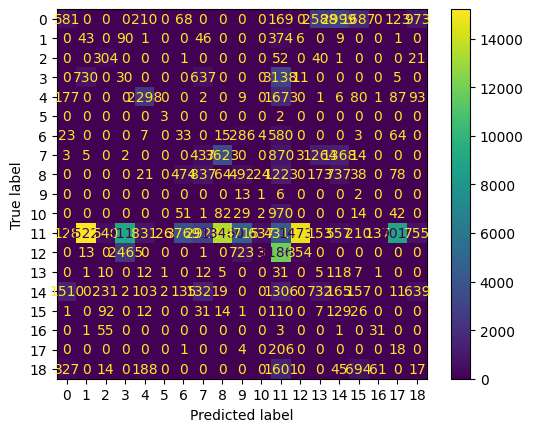

epsilon = 0.01
FPR: [1.17937508e-02 1.11699842e-03 2.28880417e-04 6.63330361e-05
 2.20908227e-05 0.00000000e+00 5.10002514e-04 7.75024314e-03
 3.01317714e-04 0.00000000e+00 1.43844533e-05 4.14130969e-02
 1.04164163e-04 6.42733187e-05 5.40972466e-02 1.28748918e-04
 2.85430894e-05 7.14280612e-06 0.00000000e+00]
TPR: [0.50702277 0.88070175 0.91169451 0.57130301 0.99864468 0.8
 0.97536946 0.65977072 0.98606104 0.27272727 0.99664148 0.99721808
 0.99850911 0.87192118 0.58516527 0.6713948  0.98901099 0.13537118
 1.        ]
FNR: [0.49297723 0.11929825 0.08830549 0.42869699 0.00135532 0.2
 0.02463054 0.34022928 0.01393896 0.72727273 0.00335852 0.00278192
 0.00149089 0.12807882 0.41483473 0.3286052  0.01098901 0.86462882
 0.        ]
TNR: [0.98820625 0.998883   0.99977112 0.99993367 0.99997791 1.
 0.99949    0.99224976 0.99969868 1.         0.99998562 0.9585869
 0.99989584 0.99993573 0.94590275 0.99987125 0.99997146 0.99999286
 1.        ]
Accuracy: 0.9100263852242744
Precision(micro,macro,weig

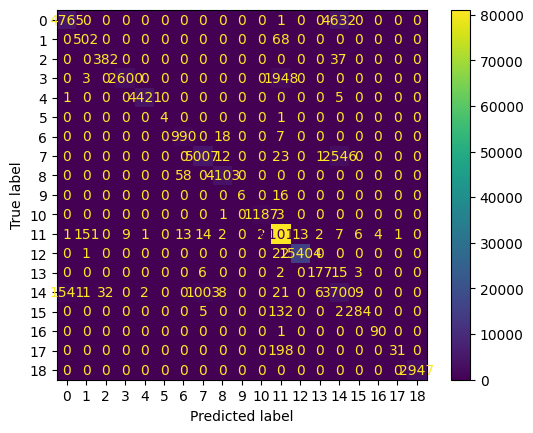

epsilon = 0.1
FPR: [2.15008561e-02 4.75368753e-02 1.64507800e-03 7.37475954e-02
 5.89088606e-05 0.00000000e+00 9.51765255e-03 1.13841120e-03
 1.11487554e-02 2.92565332e-02 1.78511065e-02 2.29187503e-01
 4.87167776e-03 2.21457290e-02 4.85336838e-02 2.26741150e-03
 2.85430894e-04 1.99070007e-02 8.52254103e-04]
TPR: [0.72845286 0.10877193 0.9928401  0.10151615 0.99887057 0.8
 0.93103448 0.00579787 0.66522471 0.27272727 0.02015113 0.64023437
 0.73280612 0.68472906 0.1851969  0.67375887 0.72527473 0.19650655
 0.99966067]
FNR: [2.71547138e-01 8.91228070e-01 7.15990453e-03 8.98483850e-01
 1.12943302e-03 2.00000000e-01 6.89655172e-02 9.94202135e-01
 3.34775294e-01 7.27272727e-01 9.79848866e-01 3.59765630e-01
 2.67193881e-01 3.15270936e-01 8.14803100e-01 3.26241135e-01
 2.74725275e-01 8.03493450e-01 3.39328130e-04]
TNR: [0.97849914 0.95246312 0.99835492 0.9262524  0.99994109 1.
 0.99048235 0.99886159 0.98885124 0.97074347 0.98214889 0.7708125
 0.99512832 0.97785427 0.95146632 0.99773259 0.99971

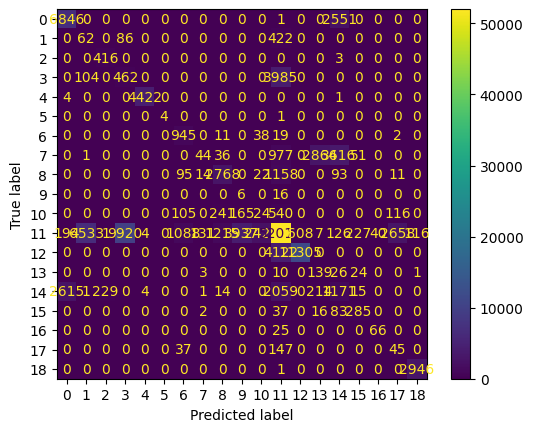

epsilon = 0.2
FPR: [5.60260487e-02 2.66862380e-02 2.10283883e-03 1.65729405e-01
 1.14135917e-03 1.42627919e-05 1.79219193e-02 9.31084657e-03
 2.95732312e-02 5.56672943e-02 2.91716713e-02 4.42135241e-01
 1.72832384e-02 9.26249938e-03 3.82653633e-02 7.01681604e-03
 1.07036585e-03 3.24211970e-02 1.51511841e-02]
TPR: [0.68333688 0.04035088 0.97852029 0.01054713 0.49649876 1.
 0.37044335 0.0056661  0.42754146 0.77272727 0.00839631 0.34237251
 0.08724963 0.1182266  0.06136328 0.5248227  0.94505495 0.31004367
 0.99389209]
FNR: [0.31666312 0.95964912 0.02147971 0.98945287 0.50350124 0.
 0.62955665 0.9943339  0.57245854 0.22727273 0.99160369 0.65762749
 0.91275037 0.8817734  0.93863672 0.4751773  0.05494505 0.68995633
 0.00610791]
TNR: [0.94397395 0.97331376 0.99789716 0.83427059 0.99885864 0.99998574
 0.98207808 0.99068915 0.97042677 0.94433271 0.97082833 0.55786476
 0.98271676 0.9907375  0.96173464 0.99298318 0.99892963 0.9675788
 0.98484882]
Accuracy: 0.3152749055123725
Precision(micro,macro

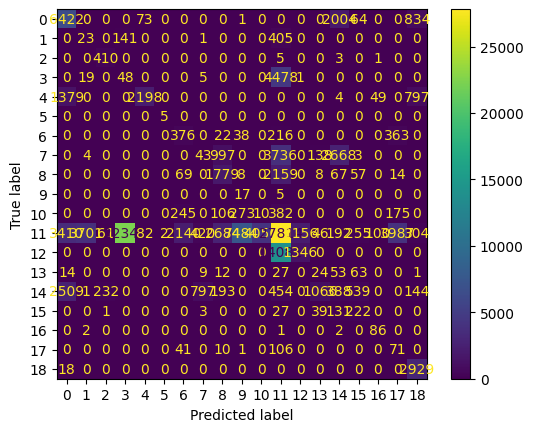

epsilon = 0.3
FPR: [6.51522563e-02 2.60776171e-02 3.42605374e-03 1.79172901e-01
 1.31514031e-02 2.13941879e-05 2.09819344e-02 1.39021871e-02
 8.03783375e-02 7.77487733e-02 1.93470897e-02 3.99857605e-01
 7.02146583e-02 1.38044806e-02 3.87806463e-02 1.03285243e-02
 1.32154504e-02 2.61712416e-02 4.71070708e-02]
TPR: [0.20046818 0.00526316 0.72792363 0.00681169 0.05330924 1.
 0.39605911 0.00382132 0.28550829 0.86363636 0.00167926 0.1474415
 0.00803786 0.07389163 0.00173968 0.37115839 0.6043956  0.15283843
 0.95351205]
FNR: [0.79953182 0.99473684 0.27207637 0.99318831 0.94669076 0.
 0.60394089 0.99617868 0.71449171 0.13636364 0.99832074 0.8525585
 0.99196214 0.92610837 0.99826032 0.62884161 0.3956044  0.84716157
 0.04648795]
TNR: [0.93484774 0.97392238 0.99657395 0.8208271  0.9868486  0.99997861
 0.97901807 0.98609781 0.91962166 0.92225123 0.98065291 0.60014239
 0.92978534 0.98619552 0.96121935 0.98967148 0.98678455 0.97382876
 0.95289293]
Accuracy: 0.13755259217000643
Precision(micro,macro

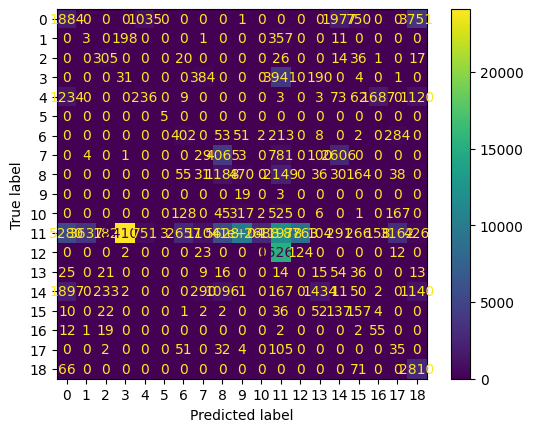

epsilon = 0.01
FPR: [1.18013942e-02 1.11699842e-03 2.36032930e-04 6.63330361e-05
 2.20908227e-05 0.00000000e+00 5.02819380e-04 7.59946020e-03
 3.01317714e-04 0.00000000e+00 1.43844533e-05 4.13961452e-02
 1.04164163e-04 6.42733187e-05 5.36267708e-02 1.28748918e-04
 2.85430894e-05 7.14280612e-06 0.00000000e+00]
TPR: [0.50702277 0.88070175 0.91169451 0.57130301 0.99864468 0.8
 0.97536946 0.66794044 0.98630137 0.27272727 0.99664148 0.99721808
 0.99850911 0.87192118 0.58832833 0.6713948  0.98901099 0.13537118
 1.        ]
FNR: [0.49297723 0.11929825 0.08830549 0.42869699 0.00135532 0.2
 0.02463054 0.33205956 0.01369863 0.72727273 0.00335852 0.00278192
 0.00149089 0.12807882 0.41167167 0.3286052  0.01098901 0.86462882
 0.        ]
TNR: [0.98819861 0.998883   0.99976397 0.99993367 0.99997791 1.
 0.99949718 0.99240054 0.99969868 1.         0.99998562 0.95860385
 0.99989584 0.99993573 0.94637323 0.99987125 0.99997146 0.99999286
 1.        ]
Accuracy: 0.9106182699850246
Precision(micro,macro,wei

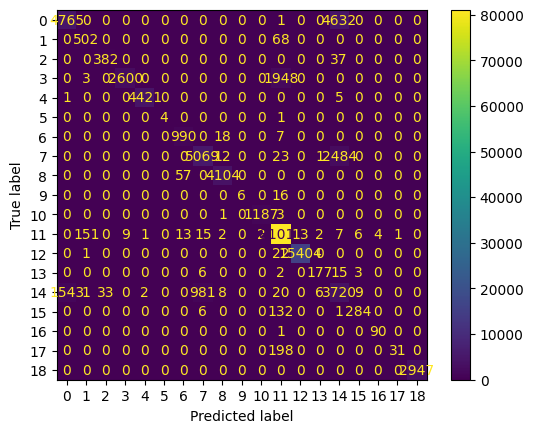

epsilon = 0.1
FPR: [2.20358934e-02 2.45095231e-02 1.64507800e-03 6.34954562e-02
 5.89088606e-05 7.13139597e-06 9.02919944e-03 9.12236790e-04
 1.21262007e-02 3.40779413e-02 1.18743662e-02 2.30696208e-01
 1.34932654e-02 2.09745263e-02 4.88622701e-02 2.32463324e-03
 2.28344715e-04 2.21212706e-02 9.97938565e-04]
TPR: [0.72398383 0.10175439 0.9928401  0.09734124 0.99796702 0.8
 0.93103448 0.00592963 0.66522471 0.27272727 0.0193115  0.68037519
 0.73099112 0.69950739 0.20291001 0.6855792  0.72527473 0.20087336
 0.99830336]
FNR: [0.27601617 0.89824561 0.0071599  0.90265876 0.00203298 0.2
 0.06896552 0.99407037 0.33477529 0.72727273 0.9806885  0.31962481
 0.26900888 0.30049261 0.79708999 0.3144208  0.27472527 0.79912664
 0.00169664]
TNR: [0.97796411 0.97549048 0.99835492 0.93650454 0.99994109 0.99999287
 0.9909708  0.99908776 0.9878738  0.96592206 0.98812563 0.76930379
 0.98650673 0.97902547 0.95113773 0.99767537 0.99977166 0.97787873
 0.99900206]
Accuracy: 0.6221849818155887
Precision(micro,ma

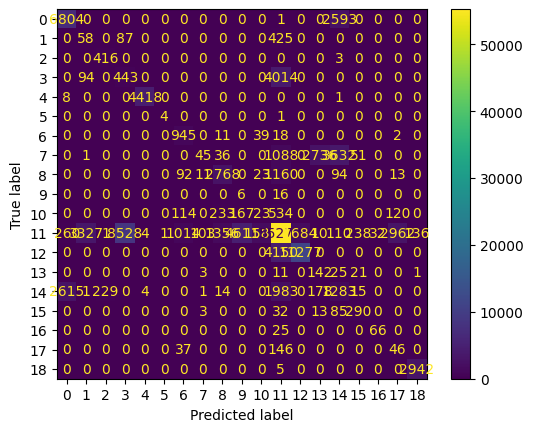

epsilon = 0.2
FPR: [6.59318821e-02 8.24860375e-03 2.05992375e-03 1.63024492e-01
 1.29599493e-03 2.13941879e-05 1.75914952e-02 9.84612601e-03
 2.66261970e-02 5.98182700e-02 2.70499644e-02 4.41033378e-01
 2.33888608e-02 9.76954444e-03 3.65552212e-02 6.54473667e-03
 8.42021136e-04 3.37926158e-02 1.54352688e-02]
TPR: [0.70312833 0.03684211 0.9928401  0.00659196 0.47232889 1.
 0.36551724 0.00592963 0.44965153 0.77272727 0.00587741 0.35251542
 0.08407338 0.15270936 0.07591333 0.57683215 0.89010989 0.3231441
 0.99457075]
FNR: [0.29687167 0.96315789 0.0071599  0.99340804 0.52767111 0.
 0.63448276 0.99407037 0.55034847 0.22727273 0.99412259 0.64748458
 0.91592662 0.84729064 0.92408667 0.42316785 0.10989011 0.6768559
 0.00542925]
TNR: [0.93406812 0.9917514  0.99794008 0.83697551 0.99870401 0.99997861
 0.9824085  0.99015387 0.9733738  0.94018173 0.97295004 0.55896662
 0.97661114 0.99023046 0.96344478 0.99345526 0.99915798 0.96620738
 0.98456473]
Accuracy: 0.32274121086785995
Precision(micro,macro

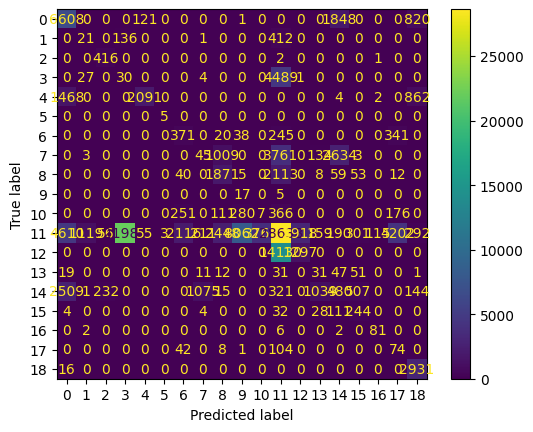

epsilon = 0.3
FPR: [8.26479760e-02 1.21222970e-02 3.07558061e-03 1.73799925e-01
 1.29820402e-02 2.85255839e-05 2.07592573e-02 8.57201016e-03
 8.29726095e-02 7.24994294e-02 2.17277167e-02 3.87550643e-01
 9.06468595e-02 1.24475994e-02 3.98634873e-02 6.21571166e-03
 1.23662935e-02 2.36784023e-02 4.52641624e-02]
TPR: [2.16854650e-01 3.50877193e-03 7.63723150e-01 5.49329818e-03
 2.68805060e-02 1.00000000e+00 4.49261084e-01 3.68955067e-03
 3.46791637e-01 8.63636364e-01 0.00000000e+00 1.52328315e-01
 1.68535684e-03 2.95566502e-02 6.32611102e-04 5.39007092e-01
 7.14285714e-01 1.57205240e-01 9.70817781e-01]
FNR: [0.78314535 0.99649123 0.23627685 0.9945067  0.97311949 0.
 0.55073892 0.99631045 0.65320836 0.13636364 1.         0.84767168
 0.99831464 0.97044335 0.99936739 0.46099291 0.28571429 0.84279476
 0.02918222]
TNR: [0.91735202 0.9878777  0.99692442 0.82620008 0.98701796 0.99997147
 0.97924074 0.99142799 0.91702739 0.92750057 0.97827228 0.61244936
 0.90935314 0.9875524  0.96013651 0.99378429

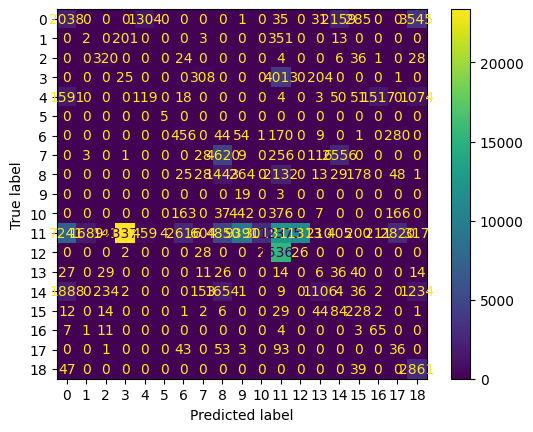

epsilon = 1e-07
FPR: [4.18857772e-03 1.34039811e-02 1.00135182e-04 2.03421311e-02
 2.65089873e-04 7.84453557e-05 1.25704845e-03 1.39700394e-02
 8.20172119e-03 1.69747803e-03 2.44391861e-02 1.99606720e-01
 2.65538489e-02 8.56977583e-04 5.57103064e-02 3.71941319e-04
 9.99008128e-05 1.46927522e-02 1.31116016e-04]
TPR: [0.689402   0.88245614 0.90214797 0.57196221 0.99864468 0.8
 0.97241379 0.39030175 0.95962509 0.31818182 0.25356843 0.82713967
 0.44311921 0.87684729 0.49327851 0.678487   0.98901099 0.46724891
 1.        ]
FNR: [0.310598   0.11754386 0.09785203 0.42803779 0.00135532 0.2
 0.02758621 0.60969825 0.04037491 0.68181818 0.74643157 0.17286033
 0.55688079 0.12315271 0.50672149 0.321513   0.01098901 0.53275109
 0.        ]
TNR: [0.99581142 0.98659602 0.99989986 0.97965787 0.99973491 0.99992155
 0.99874295 0.98602996 0.99179828 0.99830252 0.97556081 0.80039328
 0.97344615 0.99914302 0.94428969 0.99962806 0.9999001  0.98530725
 0.99986888]
Accuracy: 0.7373529202025244
Precision(micro,

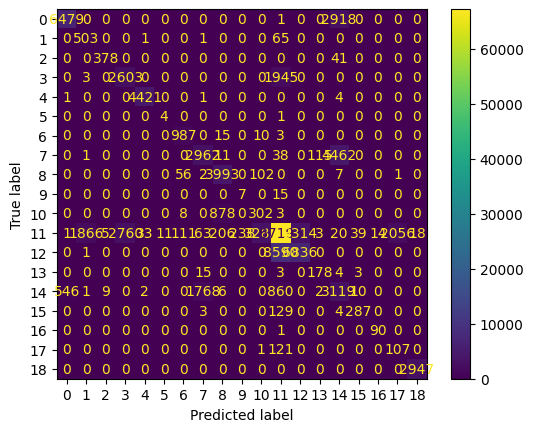

epsilon = 1e-06
FPR: [4.18857772e-03 1.34039811e-02 1.00135182e-04 2.03421311e-02
 2.65089873e-04 7.84453557e-05 1.25704845e-03 1.39700394e-02
 8.20172119e-03 1.69747803e-03 2.44391861e-02 1.99606720e-01
 2.65538489e-02 8.56977583e-04 5.57103064e-02 3.71941319e-04
 9.99008128e-05 1.46927522e-02 1.31116016e-04]
TPR: [0.689402   0.88245614 0.90214797 0.57196221 0.99864468 0.8
 0.97241379 0.39030175 0.95962509 0.31818182 0.25356843 0.82713967
 0.44311921 0.87684729 0.49327851 0.678487   0.98901099 0.46724891
 1.        ]
FNR: [0.310598   0.11754386 0.09785203 0.42803779 0.00135532 0.2
 0.02758621 0.60969825 0.04037491 0.68181818 0.74643157 0.17286033
 0.55688079 0.12315271 0.50672149 0.321513   0.01098901 0.53275109
 0.        ]
TNR: [0.99581142 0.98659602 0.99989986 0.97965787 0.99973491 0.99992155
 0.99874295 0.98602996 0.99179828 0.99830252 0.97556081 0.80039328
 0.97344615 0.99914302 0.94428969 0.99962806 0.9999001  0.98530725
 0.99986888]
Accuracy: 0.7373529202025244
Precision(micro,

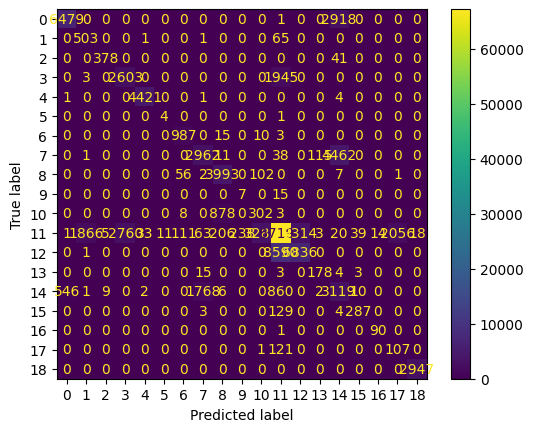

epsilon = 1e-05
FPR: [4.18857772e-03 1.34039811e-02 1.00135182e-04 2.03421311e-02
 2.65089873e-04 7.84453557e-05 1.25704845e-03 1.39700394e-02
 8.20172119e-03 1.69747803e-03 2.44391861e-02 1.99606720e-01
 2.65538489e-02 8.56977583e-04 5.57103064e-02 3.71941319e-04
 9.99008128e-05 1.46927522e-02 1.31116016e-04]
TPR: [0.689402   0.88245614 0.90214797 0.57196221 0.99864468 0.8
 0.97241379 0.39030175 0.95962509 0.31818182 0.25356843 0.82713967
 0.44311921 0.87684729 0.49327851 0.678487   0.98901099 0.46724891
 1.        ]
FNR: [0.310598   0.11754386 0.09785203 0.42803779 0.00135532 0.2
 0.02758621 0.60969825 0.04037491 0.68181818 0.74643157 0.17286033
 0.55688079 0.12315271 0.50672149 0.321513   0.01098901 0.53275109
 0.        ]
TNR: [0.99581142 0.98659602 0.99989986 0.97965787 0.99973491 0.99992155
 0.99874295 0.98602996 0.99179828 0.99830252 0.97556081 0.80039328
 0.97344615 0.99914302 0.94428969 0.99962806 0.9999001  0.98530725
 0.99986888]
Accuracy: 0.7373529202025244
Precision(micro,

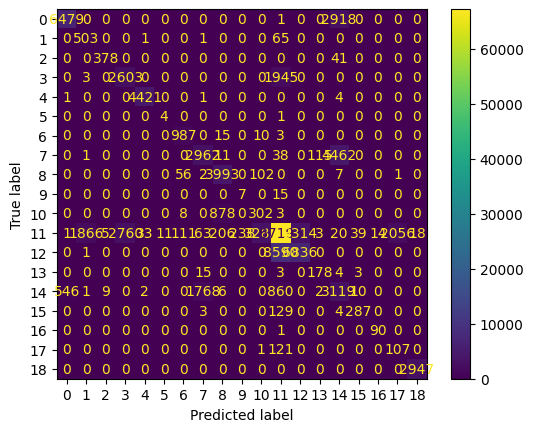

epsilon = 0.0001
FPR: [4.18857772e-03 1.34039811e-02 1.00135182e-04 2.03421311e-02
 2.65089873e-04 7.84453557e-05 1.25704845e-03 1.39700394e-02
 8.20172119e-03 1.69747803e-03 2.44391861e-02 1.99606720e-01
 2.65538489e-02 8.64119063e-04 5.57327100e-02 3.71941319e-04
 9.99008128e-05 1.46927522e-02 1.31116016e-04]
TPR: [0.689402   0.88245614 0.90214797 0.57196221 0.99864468 0.8
 0.97241379 0.38977467 0.95962509 0.31818182 0.25356843 0.82713967
 0.44311921 0.87684729 0.49327851 0.678487   0.98901099 0.46724891
 1.        ]
FNR: [0.310598   0.11754386 0.09785203 0.42803779 0.00135532 0.2
 0.02758621 0.61022533 0.04037491 0.68181818 0.74643157 0.17286033
 0.55688079 0.12315271 0.50672149 0.321513   0.01098901 0.53275109
 0.        ]
TNR: [0.99581142 0.98659602 0.99989986 0.97965787 0.99973491 0.99992155
 0.99874295 0.98602996 0.99179828 0.99830252 0.97556081 0.80039328
 0.97344615 0.99913588 0.94426729 0.99962806 0.9999001  0.98530725
 0.99986888]
Accuracy: 0.7373243956357413
Precision(micro

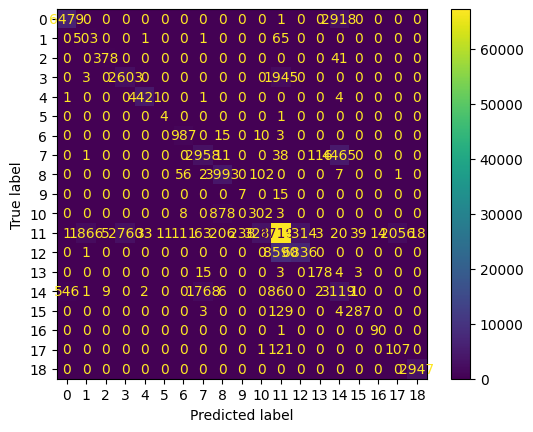

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/X-IIoTID/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "DF", epsilon)